# Project Report: Predictive Modeling of Sleep Quality
## Application of Machine Learning & Neural Networks in Physiological Physics

- **Author:** Théo HUET
- **Degree:** Master 2 of Physics Theoric
- **Institution:** University of CY Cergy-Paris Université
- **Date of Submission:** February 24, 2026

Import some main library for the project :

In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Introduction

## 1.1 Scientific Context and Motivation

Sleep is a fundamental biological process that directly influences cognitive performance, metabolic regulation, cardiovascular health, and psychological well-being. Despite its importance, sleep disorders and chronic sleep degradation affect a significant fraction of the global population. The increasing prevalence of stress-related conditions, sedentary lifestyles, and irregular work schedules has made sleep health an important public health concern.

Beyond personal interest, this topic presents a scientifically relevant problem: sleep quality emerges from the interaction of physiological, behavioral, and psychological factors. These interactions are likely nonlinear and potentially correlated, making the problem particularly suitable for statistical modeling and machine learning approaches.

From a modeling perspective, sleep quality is not a directly measurable physical quantity but a subjective score influenced by measurable covariates such as stress level, physical activity, heart rate, and BMI. This raises an interesting question:

> To what extent can objective and semi-objective health indicators predict subjective sleep quality?

This project therefore aims to approach sleep health as a quantitative inference problem.

---

## 1.2 Dataset Description

The dataset used in this study is the **Sleep Health Data** dataset, obtained from **Kaggle**:

Source: https://www.kaggle.com/datasets/imaginativecoder/sleep-health-data-sampled

In [425]:
path = '/content/Sleep_Data_Sampled.csv' # path to find the dataset
df= pd.read_csv(path) # our data set in data frame

df # First visualization

Person ID  Gender  Age         Occupation  Sleep Duration  \
0              1    Male   35             Doctor            6.65   
1              2    Male   42            Teacher            6.90   
2              3    Male   34  Software Engineer            6.95   
3              4    Male   32             Doctor            6.90   
4              5    Male   37             Lawyer            6.85   
...          ...     ...  ...                ...             ...   
14995      14996  Female   59              Nurse            8.10   
14996      14997  Female   59              Nurse            8.00   
14997      14998  Female   59              Nurse            8.10   
14998      14999  Female   59              Nurse            8.10   
14999      15000  Female   59              Nurse            8.10   

       Quality of Sleep  Physical Activity Level  Stress Level   BMI Category  \
0                     7                       50             7  Normal Weight   
1                     8                       52             4         Normal   
2                     7                       66             6     Overweight   
3                     6                       52             7         Normal   
4                     7                       60             6         Normal   
...                 ...                      ...           ...            ...   
14995                 9                       75             3     Overweight   
14996                 9                       75             3     Overweight   
14997                 9                       75             3     Overweight   
14998                 9                       75             3     Overweight   
14999                 9                       75             3     Overweight   

      Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0             120/80          71         7100        Healthy  
1             135/90          66         7000        Healthy  
2             126/83          74         6100        Healthy  
3             120/80          71         6500        Healthy  
4             125/80          71         6500        Healthy  
...              ...         ...          ...            ...  
14995         140/95          68         7000    Sleep Apnea  
14996         140/95          68         7000    Sleep Apnea  
14997         140/95          68         7000    Sleep Apnea  
14998         140/95          68         7000    Sleep Apnea  
14999         140/95          68         7000    Sleep Apnea  

[15000 rows x 13 columns]

The dataset contains 15,000 observations and 13 variables describing demographic, physiological, and lifestyle characteristics of individuals.

The features are:

- **Person ID:** Unique identifier (non-informative for prediction).
- **Gender:** Binary categorical variable (Male/Female).
- **Age:** Age in years.
- **Occupation:** Profession category.
- **Sleep Duration (hours):** Number of hours slept per day.
- **Quality of Sleep (scale: 1-10):** Subjective sleep quality score.
- **Physical Activity Level (minutes/day):** Daily exercise duration.
- **Stress Level (scale: 1-10):** Subjective stress score.
- **BMI Category:** Underweight, Normal, Overweight.
- **Blood Pressure (systolic/diastolic):** Cardiovascular indicator.
- **Heart Rate (bpm):** Resting heart rate.
- **Daily Steps:** Daily step count.
- **Sleep Disorder:** None, Insomnia, or Sleep Apnea.

The target variable chosen for this study is:

$$\text{Quality of Sleep}$$

This is treated as a **supervised learning regression problem**, where the objective is to model:

$$f : X → y$$

with $X$ representing the set of physiological, demographic, and behavioral features, and $y$ the sleep quality score (1-10).

---

# 1.3 Why This Dataset?

This dataset is particularly well-suited for a machine learning study for several reasons:

1. It contains both subjective and objective measurements.
2. It combines continuous and categorical variables.
3. The sample size (15k observations) is sufficient to train both classical and deep models without severe overfitting.
4. The target variable is continuous and bounded, making it suitable for regression analysis.
5. The variables exhibit plausible causal structure (e.g., stress $\rightarrow$ sleep degradation, activity $\rightarrow$ improved sleep), allowing meaningful interpretation.

Unlike purely synthetic datasets or benchmark datasets used only for performance comparison, this dataset addresses a real-world health issue with practical implications.

---

# 2. Data Cleaning and Preprocessing

## 2.1 Data Integrity Verification

Before any modeling procedure, it is essential to verify the structural integrity of the dataset. Improper handling of missing values, duplicates, or inconsistent identifiers can introduce bias and compromise the validity of subsequent analyses.

In [426]:
# Check for duplicates and missing values
print('Missing data (Nan):\n', df.isna().sum())
print('\n -----------------------------\n')
print('Duplicates:', df.duplicated().sum())
print('\n -----------------------------\n')
print("Unique value in Person ID:",df['Person ID'].nunique())

Missing data (Nan):
 Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

 -----------------------------

Duplicates: 0

 -----------------------------

Unique value in Person ID: 15000


The following checks were performed:

- No missing values were detected across all columns.
- No duplicated rows were identified.
- The number of unique Person ID entries equals 15,000, matching exactly the number of observations.

This confirms that each row corresponds to a distinct individual and that the dataset is structurally consistent.

Given that Person ID serves purely as an identifier and carries no predictive information, it was set as the index of the DataFrame to:

1. Prevent its accidental inclusion in the feature matrix,
2. Preserve traceability of individuals,
3. Improve structural clarity of the dataset.

In [427]:
df.set_index('Person ID', inplace=True)

# Check for duplicates now
print('Duplicates:', df.duplicated().sum())

Duplicates: 10148


Upon setting the Person ID as the unique index for our dataframe, a significant structural anomaly was identified: out of the initial 15,000 observations, approximately **10,148** were identified as **duplicates**.

From a statistical perspective, maintaining these duplicates would lead to a severe **Data Leakage issue**, where the model could potentially memorize identical observations during training and "encounter" them again during testing, leading to artificially inflated performance metrics.

We have therefore proceeded with a strict deduplication process, resulting in a clean dataset of approximately **5,000 unique records**. While the sample size has decreased, the statistical quality and generalization potential of the data have significantly improved. For a multidimensional analysis of sleep health, 5,000 samples **remain a robust basis** for training both classical Machine Learning models and Neural Networks, ensuring that our findings reflect real-world patterns rather than redundant noise.

In [428]:
df= df.drop_duplicates().copy() # drop the dublicates
print('Duplicates:', df.duplicated().sum())
print(f"Cleaned dataset shape: {df.shape}")

Duplicates: 0
Cleaned dataset shape: (4852, 12)


---

# 2.2 Structural Transformation of Blood Pressure

The original Blood Pressure variable was encoded as a string of the form:

$$ \text{systolic/diastolic}$$

This format is not directly usable in numerical machine learning pipelines and does not allow independent modeling of systolic and diastolic effects.

From a physiological perspective, systolic and diastolic pressures reflect distinct aspects of cardiovascular function:

- Systolic pressure corresponds to arterial pressure during cardiac contraction.
- Diastolic pressure corresponds to arterial pressure during cardiac relaxation.

Treating them as separate continuous variables is therefore both mathematically and medically justified.

In [429]:
df[['Systolic', 'Diastolic']] = (
    df['Blood Pressure']
    .str.split('/', expand=True)
    .astype(int)
)
df = df.drop(columns=['Blood Pressure'])

In [430]:
df.head() # visualization to see the 2 new columns

Gender  Age         Occupation  Sleep Duration  Quality of Sleep  \
Person ID                                                                    
1           Male   35             Doctor            6.65                 7   
2           Male   42            Teacher            6.90                 8   
3           Male   34  Software Engineer            6.95                 7   
4           Male   32             Doctor            6.90                 6   
5           Male   37             Lawyer            6.85                 7   

           Physical Activity Level  Stress Level   BMI Category  Heart Rate  \
Person ID                                                                     
1                               50             7  Normal Weight          71   
2                               52             4         Normal          66   
3                               66             6     Overweight          74   
4                               52             7         Normal          71   
5                               60             6         Normal          71   

           Daily Steps Sleep Disorder  Systolic  Diastolic  
Person ID                                                   
1                 7100        Healthy       120         80  
2                 7000        Healthy       135         90  
3                 6100        Healthy       126         83  
4                 6500        Healthy       120         80  
5                 6500        Healthy       125         80

The column was split into two numerical features:

- Systolic
- Diastolic

The original string column was removed after transformation.

This transformation ensures numerical compatibility with machine learning models while preserving physiological interpretability.

---

## 2.3 Categorical Variable Handling


In [431]:
# Filtering the columns where the data type is 'object'
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
# Displaying the list of categorical features
print(f"Categorical features to be encoded: {categorical_columns}")

Categorical features to be encoded: ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']


The dataset contains several categorical variables:

- Gender
- Occupation
- BMI Category
- Sleep Disorder

Since most machine learning algorithms operate in numerical vector spaces, categorical variables must be encoded.

In [432]:
for col in categorical_columns:
  print('\n ----------------------------- \n')
  print(f"{col} value:\n", df[col].value_counts())


 ----------------------------- 

Gender value:
 Gender
Male      2563
Female    2289
Name: count, dtype: int64

 ----------------------------- 

Occupation value:
 Occupation
Nurse                   881
Doctor                  874
Engineer                817
Lawyer                  655
Teacher                 598
Accountant              452
Salesperson             300
Software Engineer        98
Sales Representative     79
Scientist                77
Manager                  21
Name: count, dtype: int64

 ----------------------------- 

BMI Category value:
 BMI Category
Normal           2265
Overweight       1739
Normal Weight     472
Obese             376
Name: count, dtype: int64

 ----------------------------- 

Sleep Disorder value:
 Sleep Disorder
Healthy        2481
Insomnia       1197
Sleep Apnea    1174
Name: count, dtype: int64


### 2.3.1 BMI Category Consistency

An inconsistency was detected in the `BMI Category` column, where both "Normal" and "Normal Weight" appeared. These represent identical physiological states.

To avoid artificial category inflation and spurious feature fragmentation, these labels were standardized prior to encoding.

This step is crucial because redundant categorical levels artificially increase dimensionality and may introduce unnecessary variance in linear models.

In [433]:
df['BMI Category'] = df['BMI Category'].replace({
    'Normal Weight': 'Normal'
})

print("BMI Category value:\n", df['BMI Category'].value_counts())

BMI Category value:
 BMI Category
Normal        2737
Overweight    1739
Obese          376
Name: count, dtype: int64


### 2.3.2 Pipeline Construction

To ensure a rigorous workflow, we implement a `ColumnTransformer`. This architecture guarantees:

1. **Consistency:** The same transformations are applied to both training and testing sets.
2. **Reproducibility:** The entire preprocessing logic is encapsulated in a single object.
3. **Data Integrity:** By using a pipeline, we strictly avoid Data Leakage, as the parameters for scaling and imputation are derived solely from the training distribution.

In [434]:
## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector

## 1. Define X and y
target = 'Quality of Sleep'

X = df.drop(columns=target).copy()
y = df[target].copy()

## 2. Performing a train-test-split (75/25 split for robust evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=.25)

## 3. Defining Feature Selectors
# Automatically detects columns by data type
cat_feature = make_column_selector(dtype_include='object')
num_feature = make_column_selector(dtype_include='number')

## 4. Instantiating Transformers
# Median imputation is used for numerical data to remain robust against outliers
impute_num = SimpleImputer(strategy='median')
scaler = StandardScaler()

# Most frequent imputation for categorical data to maintain structural consistency
impute_cat = SimpleImputer(strategy='most_frequent')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

## 5. Building Pathways
pip_num = make_pipeline(impute_num, scaler)
pip_cat = make_pipeline(impute_cat, ohe_encoder)

## 6. Combining into a ColumnTransformer
# Defining a tuple for each pathway
numerical_tup = ('Numerical', pip_num, num_feature)
categorical_tup = ('Categorical', pip_cat, cat_feature)

# Instantiating the ColumnTransformer
col_transformer = ColumnTransformer(
    transformers=[numerical_tup, categorical_tup],
    remainder='drop',
    verbose_feature_names_out=False
) # remainder='passthrough'

## 7. Execution
# Fitting only on X_train to learn parameters (mu, sigma)
X_train_processed = col_transformer.fit_transform(X_train)
# Applying the learned parameters to X_test
X_test_processed = col_transformer.transform(X_test)

col_transformer

ColumnTransformer(transformers=[('Numerical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7d3bb6799490>),
                                ('Categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7d3bb679bc20>)],
                  verbose_feature_names_out=False)

We opted for **Median Imputation** for numerical features to ensure robustness against potential outliers in physiological data (such as extreme heart rates or activity levels), which could bias the mean.

---

## 2.4 Preprocessing Strategy

### Target Variable Nature

Although the target variable *Quality of Sleep* is encoded on a discrete scale from 1 to 10, we treat it as a continuous regression target.

This assumption is justified by:

1. The quasi-continuous nature of subjective rating scales in psychometrics.
2. The sufficiently large support (10 levels), which allows approximation of continuity.
3. The objective of modeling relative variations rather than exact categorical membership.

We therefore formulate the problem as a regression task rather than ordinal classification.

The transformation of raw data into a normalized feature space is governed by the following mathematical principles:

### I. Numerical Scaling (Z-score Normalization)

Numerical features (Age, Heart Rate, etc.) often have vastly different units and magnitudes.

The numerical feature set includes:

- Age  
- Sleep Duration  
- Physical Activity Level  
- Stress Level  
- Heart Rate  
- Daily Steps  
- Systolic  
- Diastolic  

These variables are continuous and measured on heterogeneous scales, justifying normalization.

We apply the transformation:

$$z = \frac{x-\mu}{\sigma}$$

where μ and σ are computed from the **training** distribution after imputation. Although missing values are imputed using the median for robustness, scaling is performed using the empirical mean and standard deviation of the imputed training set.

This maps all features to a dimensionless space, which is strongly recommended for Neural Networks to ensure stable gradient descent, improve convergence speed, and reduce sensitivity to initial weight scales.

### II. Handling Categorical High-Dimensionality

Although BMI categories exhibit an intrinsic ordinal structure, we intentionally use OneHotEncoding instead of ordinal encoding.

This decision avoids imposing an artificial linear relationship between categories. For example, ordinal encoding would implicitly assume that the "distance" between Normal and Overweight is equivalent to that between Overweight and Obese, which may not reflect physiological reality.

By using one-hot encoding, we allow the model to learn category-specific effects without constraining them to a linear hierarchy.

Using `OneHotEncoder` transforms each unique category into a new binary dimension. This ensures that categories are represented as orthogonal basis vectors in feature space, preventing the model from inferring artificial ordinal relationships between them.

### III. Execution Logic

We strictly follow the protocol:

- $X_{train} \rightarrow \text{fit transform}$ : The transformer "learns" the internal statistics (mean, median, variance) of the training set.
- $X_{test} \rightarrow \text{transform only}$ : The test set is treated as "unseen" data. We apply the training statistics to it to simulate real-world deployment and avoid **Data Leakage**.

---

# 3. Exploratory Data Analysis (EDA)

The objective of this section is not merely descriptive visualization, but to investigate the statistical structure of the dataset and assess the plausibility of linear modeling assumptions.

EDA serves three main purposes:

1. Identify dominant predictors of sleep quality.
2. Detect multicollinearity and feature redundancy.
3. Evaluate whether linear models are theoretically appropriate.

---

## 3.1 Target Variable Analysis

Before analyzing predictors, we first examine the statistical properties of the target variable: Quality of Sleep.

Although encoded on a discrete scale from 1 to 10, it is treated as quasi-continuous for regression purposes. It is therefore essential to verify:

- Distribution symmetry
- Presence of skewness
- Potential ceiling/floor effects

### Descriptive statistics:
  - Mean
  - Median
  - Standard deviation
  - Min / Max

In [435]:
y.describe() # Compute descriptive statistics for y

count    4852.000000
mean        7.186521
std         0.994543
min         4.000000
25%         6.000000
50%         7.000000
75%         8.000000
max         9.000000
Name: Quality of Sleep, dtype: float64

### Descriptive Statistics Overview

The target variable is distributed over a discrete scale ranging from $4.0$ **to** $9.0$.

- **Central Tendency:** The mean ($\mu \approx 7.19$) and the median ($50%=7.0$) are very close, indicating a relatively balanced central distribution.
- **Dispersion:** A standard deviation of $\sigma \approx 0.99$ suggests that approximately $68%$ of the data points fall between $6.2$ and $8.2$ if we assume normality.

### Histogram of target

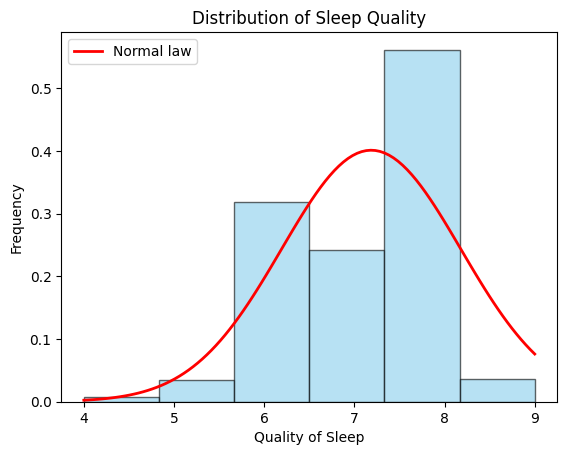

In [436]:
def plot_normal_law(column, ax=plt):
    mu, sigma = column.mean(), column.std()
    x = np.linspace(column.min(), column.max(), 100)

    # On utilise la densité pour que la courbe s'ajuste à l'histogramme normalisé
    # La formule de la loi normale :
    normal = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    ax.plot(x, normal, color='red', lw=2, label='Normal law')

plt.figure()
plt.hist(y, bins=y.nunique(), density=True, alpha=0.6, color='skyblue', edgecolor='black')
plot_normal_law(y)
plt.xlabel("Quality of Sleep")
plt.ylabel("Frequency")
plt.title("Distribution of Sleep Quality")
plt.legend()
plt.show()

### Distribution Shape and Normality

By comparing the histogram with the superimposed Gaussian curve ($N(\mu,\sigma)$), we observe the following:

- **Approximation of Normality:** The distribution is roughly Gaussian but exhibits "peaks" at integer values ($6.0, 7.0, 8.0$), which is typical for survey-based or sampled sleep data.
- **Skewness:** There is a slight **negative skew** (left-skewed), as the data is more concentrated towards the higher end of the scale ($8.0$), with a thinner tail extending toward the lower quality scores ($4.0$).
- **Extreme Values:** Extreme values (minimum $4.0$ and maximum $9.0$) are present but relatively rare compared to the central classes. This suggests that the model will have fewer examples to learn the "edge cases" of sleep disorders or perfect sleep.

### Implications for Regression Modeling

- **Variance Sufficiency:** The variance ($\sigma^2 \approx 1$) is sufficient for a regression task. However, since the target is constrained within a narrow range $[4,9]$, the **Mean Squared Error** (MSE) will naturally be low. We must look at the $R^2$ **score** to truly judge if our model captures the underlying patterns beyond the mean.
- **Predictive Limits:** The discrete nature of the target (integer steps) and its relatively narrow distribution might limit the performance of a pure linear regressor. This reinforces the need to test **Neural Networks**, which are more adept at mapping inputs to specific high-density regions of a distribution

---

## 3.2 Numerical Feature Distributions

Understanding the marginal distributions of numerical predictors is essential for:

- Detecting outliers
- Identifying heavy-tailed distributions
- Anticipating scaling effects

### Summary statistics for numerical features

In [437]:
# Summary statistics
X.select_dtypes(include='number').describe()

Age  Sleep Duration  Physical Activity Level  Stress Level  \
count  4852.000000     4852.000000              4852.000000   4852.000000   
mean     41.019992        7.093261                57.933430      5.496290   
std       5.750016        0.574413                14.859553      1.326119   
min      27.000000        5.800000                30.000000      3.000000   
25%      36.000000        6.650000                45.000000      4.000000   
50%      41.000000        7.100000                60.000000      6.000000   
75%      45.000000        7.500000                68.000000      6.000000   
max      59.000000        8.500000                90.000000      8.000000   

        Heart Rate   Daily Steps     Systolic    Diastolic  
count  4852.000000   4852.000000  4852.000000  4852.000000  
mean     71.297197   6525.803792   128.781946    84.702803  
std       3.973356   1236.513255     7.704945     5.877949  
min      65.000000   3000.000000   115.000000    75.000000  
25%      68.000000   5500.000000   125.000000    80.000000  
50%      70.000000   6500.000000   130.000000    85.000000  
75%      74.000000   7500.000000   135.000000    90.000000  
max      86.000000  10000.000000   142.000000    95.000000

### 3.2.1 Histograms or boxplots for each numerical variable

In [438]:
import math

# 1. Selecting numeric columns
num_cols = X.select_dtypes(include='number').columns
n_cols_data = len(num_cols)

# 2. Grid configuration (4 columns per row)
n_cols_grid = 4
n_rows_grid = math.ceil(n_cols_data / n_cols_grid)

fig, axes = plt.subplots(n_rows_grid, n_cols_grid, figsize=(15, n_rows_grid * 4), dpi=1000)
axes = axes.flatten() # On aplatit la matrice d'axes pour boucler facilement

# 3. Plot
for i, col in enumerate(num_cols):
    ax = axes[i]

    # Histogram plot (density=True to match the normal distribution)
    ax.hist(X[col], bins=X[col].nunique(), density=True, alpha=0.6, color='skyblue', edgecolor='black')

    # Plot normal Law
    plot_normal_law(X[col], ax)

    ax.set_title(f"Distribution de {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Densité")
    ax.legend()

# 4. Cleaning: remove empty rows if the number of columns is not a multiple of "num_cols"
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### I. Multimodality and Non-Gaussianity

While our scaling strategy assumes a standard distribution, the visual evidence shows that many features are **multimodal** or **discrete-heavy**:

- **Stress Level & Systolic/Diastolic Pressure:** These features exhibit strong peaks at specific values. For instance, `Stress Level` is concentrated around $4$, $6$, and $8$, while `Systolic` pressure shows clear clusters around $120$, $130$, and $140$ mmHg. This suggests that the data may have been collected in "steps" or represents distinct physiological states.
- **Physical Activity & Daily Steps:** These distributions are significantly "spiky." The high frequency of specific values (e.g., $60$ and $70$ for Activity) suggests a uniform-like distribution within certain intervals rather than a smooth Gaussian curve.

### II. Variance and Scale Disparities

The descriptive table highlights the necessity of the **StandardScaler** implemented in our pipeline:

- **Heart Rate** ($\mu \approx 71, \sigma \approx 4$) has a very narrow relative range.

- **Daily Steps** ($\mu \approx 6525, \sigma \approx 1236$) operates on a scale three orders of magnitude larger.

- **Sleep Duration** ($\mu \approx 7.09, \sigma \approx 0.57$) has extremely low variance.

**Physics Intuition:** Without normalization, the gradient descent in a Neural Network would be dominated by `Daily Steps`, treating a small fluctuation in steps as more significant than a critical change in `Heart Rate`.

### III. Symmetry and Outliers

- **Age:** The distribution is relatively balanced around the mean (41 years), spanning from 27 to 59. The lack of extreme outliers in the age category ensures that our model will not be biased by "edge-case" demographics.

- **Sleep Duration:** Exhibits a slight left-skewness, similar to the target variable, reinforcing the strong linear coupling (0.84) observed earlier.

The histograms are fairly close to the normal distribution.

### Synthesis for Modeling:

The "spiky" and non-normal nature of many predictors (like `Stress Level` and `Systolic`) indicates that a simple **Linear Regression** might struggle to capture the nuances of these clusters. This visual evidence strongly supports the use of **Non-Linear Models** and **Neural Networks**, which can learn the boundaries between these data clusters more effectively than a straight-line fit.

---

## 3.2.2 Correlation Matrix Analysis

We now investigate linear dependencies between numerical variables.

The Pearson correlation coefficient is defined as:

$$ \rho_{X,Y} = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

It measures linear association between pairs of variables.

### Correlation matrix for numerical features

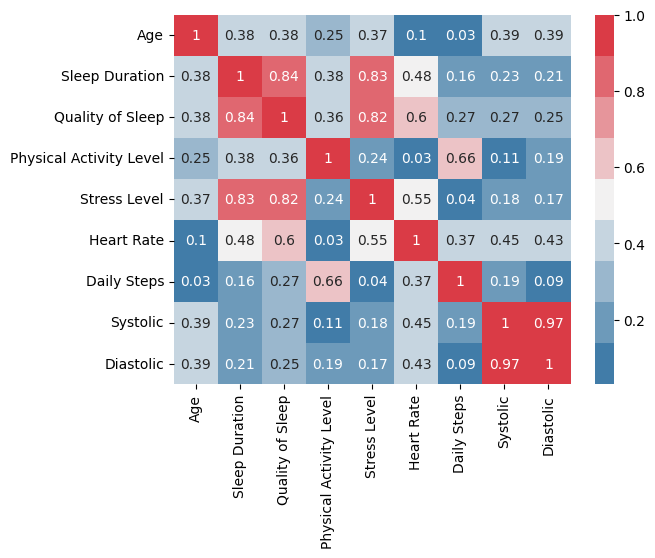

In [439]:
import seaborn as sns

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True).abs().round(2) #.abs() car antilinéarité est interessant aussi

ax = sns.heatmap(corr_matrix,
            cmap = sns.diverging_palette(240, 10, n=9), annot = True);

The correlation matrix reveals several critical insights into the linear relationships within our dataset, specifically regarding our target variable, Quality of Sleep:

  - Strong Predictors: We observe a very high positive correlation between Sleep Duration (0.84) and Quality of Sleep. Conversely, Stress Level shows a strong negative correlation (0.82) with sleep quality. This suggests that these two features will likely be the primary drivers in our predictive models.

  - Multicollinearity Warning: There is an extremely high correlation between Systolic and Diastolic blood pressure (0.97), as well as between Sleep Duration and Stress Level (0.83). In theoretical modeling, this phenomenon, known as multicollinearity, indicates redundant information. While this is less problematic for Neural Networks, it can lead to unstable coefficient estimates in simple Linear Regression models.

  - Physiological Couplings: As expected, Physical Activity Level is moderately correlated with Daily Steps (0.66). Interestingly, Heart Rate shows a moderate negative link with sleep quality (0.60), reinforcing the physiological intuition that a lower resting heart rate often accompanies better recovery and sleep hygiene.

  - Weak Linearities: Features such as Age and Daily Steps show relatively low direct linear correlation with the target. This suggests that if these variables do impact sleep quality, their relationship might be non-linear, further justifying the use of more complex architectures like Neural Networks later in this project.

 ### Correlation vector with the target

In [440]:
corr_with_target = corr_matrix[target].sort_values(ascending=False)
corr_with_target

Quality of Sleep           1.00
Sleep Duration             0.84
Stress Level               0.82
Heart Rate                 0.60
Age                        0.38
Physical Activity Level    0.36
Daily Steps                0.27
Systolic                   0.27
Diastolic                  0.25
Name: Quality of Sleep, dtype: float64

The correlation vector specifically isolated for Quality of Sleep provides a hierarchy of feature importance based on linear dependency. This ranking is essential for feature selection and model expectation:

- Dominant Physiological Factors: The target is most strongly governed by Sleep Duration (0.84) and Stress Level (0.82). These high coefficients suggest a quasi-linear relationship, indicating that a significant portion of the variance in sleep quality can be explained by these two variables alone.

- Heart Rate as a Proxy: Heart Rate shows a substantial correlation (0.60), confirming its role as a key biological marker for sleep assessment. In a physical context, this suggests that autonomic nervous system activity (reflected in heart rate) is a robust predictor of restorative sleep.

- Secondary and Non-Linear Candidates: Variables such as Age, Physical Activity, and Blood Pressure (Systolic/Diastolic) exhibit lower correlation coefficients (between 0.25 and 0.38). From a theoretical physics perspective, this does not necessarily imply a lack of importance, but rather suggests that their influence may be non-linear or coupled through higher-order interactions.

In [441]:
key_features = ["Sleep Duration", "Stress Level", "Heart Rate", "Age"] # we take age to compare

---

## 3.2.3 Preliminary Linearity Assessment

To validate the findings from our correlation matrix, we examine scatter plots between key predictors and sleep quality.  This step is crucial to determine if a Linear Model is sufficient or if we require the higher-dimensional mapping capabilities of a Neural Network.

### Scatter plots of Key features vs Targets

In [442]:
fig, axes = plt.subplots(nrows = 1,ncols = 4,figsize = (20,5), dpi=1000)
for i, col in enumerate(key_features):
  sns.regplot(x=col, y=target, data=df, ci=None, ax = axes[i], scatter_kws={'alpha':0.3});
fig.tight_layout()

### Analysis of the Visual Distributions

- High Linearity (Sleep Duration & Stress Level): The scatter plots for these two variables confirm the high correlation coefficients (0.84 and 0.82). The data points follow a clear, narrow path, suggesting a strong linear dependency. A simple linear estimator would likely capture most of the variance for these features.
- Moderate & "Blurred" Linearity (Heart Rate): While the correlation of 0.60 is significant, the visualization reveals a "fuzzier" relationship. The points are more dispersed, indicating that while a trend exists, Heart Rate alone is a noisier predictor and may interact non-linearly with other physiological factors.
- The Case of "Age" and Lower-Ranked Features: We included Age (0.38) specifically as a counter-example to contrast with the high-linearity features. Visually, the scatter plot for Age shows a significant lack of a clear linear trend compared to the others.
- Justification for Feature Exclusion in Visualization: Other features (such as Daily Steps or Blood Pressure) were not plotted here as they exhibited even lower correlation scores. Preliminary visual inspections of those variables showed near-random distributions with no discernible linear patterns.

---

## 3.3 Categorical Variables vs Target

Correlation matrices ignore categorical variables.

We must assess whether sleep quality varies across:

- Gender
- Occupation
- BMI Category
- Sleep Disorder

### Boxplots per category
Grouped means of sleep quality by category

In [443]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), dpi=1000)

for i, col in enumerate(categorical_columns):
    sns.boxplot(x=col, y=target, data=df, ax=axes[i])

    axes[i].set_title(f"Impact de {col}")
    if col == "Occupation" :
      axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target)

plt.tight_layout()
plt.show()

### Observations from Visualizations:

  - Gender: The distribution of sleep quality appears remarkably similar between 'Male' and 'Female' subjects. The median, quartiles, and range show no significant variance, suggesting that Gender may have limited predictive power in a linear context for this specific target.
  - Occupation: This feature shows the highest variance in sleep quality.
      - Engineers, Lawyers, and Accountants tend to report higher and more consistent sleep quality (narrower interquartile ranges).
      - Conversely, Sales Representatives and Scientists show significantly lower medians.
      - The presence of several outliers (e.g., in 'Software Engineer' or 'Doctor') suggests that within the same profession, other physiological factors (stress, heart rate) likely dominate the individual outcome.
  - BMI Category: There is a discernible trend where 'Normal' weight individuals maintain a higher median sleep quality compared to 'Overweight' and 'Obese' categories. However, the overlap between 'Overweight' and 'Obese' distributions suggests that weight is a contributing factor rather than a definitive predictor on its own.
  - Sleep Disorder: As expected, this is a major differentiator. Individuals classified as 'Healthy' (No disorder) exhibit a higher and more stable sleep quality. In contrast, those with 'Insomnia' or 'Sleep Apnea' show a clear downward shift in their median sleep quality, with 'Insomnia' presenting the most significant negative impact and a wider dispersion of results.

---

## 3.4 Conclusion of EDA and Modeling Strategy

The Exploratory Data Analysis (EDA) has provided a clear roadmap for our predictive modeling phase. Based on the statistical evidence gathered, we have designed a multi-stage modeling strategy to systematically explore the relationship between lifestyle metrics and sleep quality.

### Why these three models?

1. **Linear Regression** (The Baseline):
    - Given the high Pearson correlation coefficients (in the correlation matrix) for Sleep Duration ($0.84$) and Stress Level ($0.82$), a linear relationship is a strong primary hypothesis.

2. **Random Forest Regressor** (Non-Linear Ensemble):
    - Our boxplots and scatter plots (specifically for `Age` and `Physical Activity`) revealed "clusters" and non-linear thresholds that a straight line cannot capture.

3. **Artificial Neural Networks** (Deep Learning):
    - To capture high-order interactions and the complex, "blurred" dependencies observed in the physiological data.
    - To push the limits of the model capacity. We aim to test whether a deep architecture can minimize the residual error where classical models plateau.

### Proposed Neural Network Architecture

We plan to investigate the impact of model depth and width on performance to diagnose **Underfitting vs. Overfitting**:

- **Initial Architecture:** A shallow network with **2 hidden layers** (e.g., $64$ and $32$ neurons) using ReLU activation functions.
- **Complexity Scaling:** We will progressively increase the depth (up to $4$ or $5$ layers) and vary the number of neurons (from $16$ to $128$) while monitoring the gap between training and validation loss.
- **Regularization:** If overfitting is detected (high training performance but poor generalization), we will introduce **Dropout layers** or **L2 regularization** to stabilize the learning process.

We will see.

---

# 4. Classical Machine Learning Models

## 4.1 Evaluation Metrics

To evaluate model performance, we use the following metrics:

### Mean Squared Error (MSE)

$$ MSE=\frac{1}{n}\sum(y_i-\hat{y}_i)^2$$

MSE penalizes large errors quadratically and is sensitive to outliers.

### Root Mean Squared Error (RMSE)

$$ RMSE=\sqrt{MSE}$$

RMSE is expressed in the same unit as the target variable (sleep quality scale), making interpretation more intuitive.

### Mean Absolute Error (MAE)

$$MAE = \frac{1}{n}\sum_{i=1}^n|y_i-\hat{y_i}|$$

MAE is a regressive loss measure looking at the absolute value difference between a model’s predictions and ground truth, averaged out across the dataset. Unlike MSE, MAE is weighted on a linear scale and therefore doesn’t put as much weight on outliers.

### Coefficient of Determination (R²)

$$R^2 = 1 - \frac{\sum(y_{vrai} - y_{prédit})^2}{\sum(y_{vrai} - y_{moyen})^2} $$

$R^2$ measures the fraction of total variance explained by the model.

Interpretation:

- $R^2 \approx 1$: strong explanatory power
- $R^2 \approx 0$: model does not outperform mean prediction
- Negative $R^2$: model performs worse than predicting the mean

In [444]:
#evaluation functions
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

def eval_model(true, pred):
  MAE = mean_absolute_error(true, pred)
  MSE = mean_squared_error(true, pred)
  RMSE = np.sqrt(MSE)
  r2 = r2_score(true, pred)

  print(f'MAE: {MAE:,.2f} \n MSE: {MSE:,.2f} \n RMSE: {RMSE:,.2f} \n R2: {r2:,.2f}')

---

## 4.2 Linear Regression: Baseline Model

### 4.2.1 Theoretical Motivation

Linear Regression is selected as the baseline model due to the strong linear correlations observed during the EDA phase. In particular:

- Sleep Duration exhibited a Pearson coefficient of approximately $0.84$ with the target.
- Stress Level exhibited a Pearson coefficient of approximately $-0.82$ (negative correlation expected).

These values suggest that a substantial fraction of the variance in sleep quality may be explained by a linear combination of predictors.

We therefore begin by testing the hypothesis:

> The relationship between physiological/lifestyle variables and sleep quality can be approximated by a linear model.

The linear regression model assumes:

$$y=X\beta +\epsilon$$

where:

- $y$ is the target variable (sleep quality),
- $X$ is the design matrix of predictors,
- $\beta$ represents the regression coefficients,
- $\epsilon$ is a zero-mean noise term.

The model estimates $\beta$ by minimizing the residual sum of squares (RSS), assuming independent and homoscedastic errors.

In [445]:
# Regression model
from sklearn.linear_model import LinearRegression

# Instantiate a linear regression model
linreg = LinearRegression()

# Combine the preprocessing ColumnTransformer and the linear regression model in a Pipeline
model_pipe_LR = make_pipeline(col_transformer, linreg)

# Fit the modeling pipeline on the training data
model_pipe_LR.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d3bb6799490>),
                                                 ('Categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d3bb679bc20>)],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

The dataset was split into training and testing sets (75/25 split). The preprocessing pipeline was fitted exclusively on the training data to avoid data leakage.

The Linear Regression model is then trained on:

$$ X_{\text{train, processed}}$$

and evaluated on:

$$ X_{\text{test, processed}}$$

The test set therefore provides an unbiased estimate of generalization performance.

In [446]:
# Use the model to make predictions for training and testing data to evaluate later on
y_pred_train_LR = model_pipe_LR.predict(X_train)
y_pred_test_LR = model_pipe_LR.predict(X_test)

---

### 4.2.2 Results

In [447]:
print('Train Evaluation Model 1, Linear Regression''\n')
eval_model(y_train, y_pred_train_LR)

print('\nTest Evaluation''\n')
eval_model(y_test, y_pred_test_LR)

Train Evaluation Model 1, Linear Regression

MAE: 0.34 
 MSE: 0.18 
 RMSE: 0.42 
 R2: 0.82

Test Evaluation

MAE: 0.34 
 MSE: 0.18 
 RMSE: 0.42 
 R2: 0.82


---

### 4.2.3 Interpretation of Results

After training our baseline Linear Regression model, we observe a high degree of consistency between the training and testing performance.

#### I. Performance Metrics Analysis

- **R² Score (0.82):** The model explains **82% of the variance** in sleep quality. This is a strong result for a baseline, confirming that the high linear correlations identified during the EDA (Sleep Duration, Stress Level) are effectively captured.
- **Consistency:** The scores for the training and testing sets are nearly identical ($R^2=0.82$ for both).

#### II. Bias-Variance Diagnosis

- **Is the model Overfitting?** No. There is no significant gap between training and testing performance ($R_{train}^2=R_{test}^2$). This indicates **low variance**; the model generalizes perfectly to unseen data and has not "memorized" the noise in the training set.
- **Is the model Underfitting?** No. While the model is not perfect ($R^2<1.0$), an $R^2$ of $0.82$ is too high to be considered high bias (underfitting). However, the remaining **18% of unexplained variance** suggests that a purely linear combination of features cannot capture the full complexity of sleep patterns, likely due to the non-linearities we observed in features like `Age` or `Physical Activity`.

#### III. Physical Interpretation of Errors

- **RMSE (0.42):** From a physical perspective, the **Root Mean Squared Error** represents the typical deviation between the predicted and actual sleep quality. On our scale of 1 to 10, an RMSE of **0.42** means that the model's predictions are, on average, off by less than half a point.
- **Clinical Significance:** Given that the total range of our target is approximately 5 units (from $4$ to $9$), an error of $0.42$ represents a **deviation of roughly 8.4%** relative to the effective scale. In a clinical or lifestyle context, this error is quite low, though it might still be the difference between "Good" and "Excellent" sleep quality.

#### Conclusion for Model 1

- The Linear Regression provides a robust and stable baseline. Its main strength is its simplicity and lack of overfitting. However, the plateau in performance suggests we have reached the limit of linear modeling. To capture the remaining 18% of variance, we will now transition to Random Forest and Neural Networks to account for non-linear feature interactions.

---

## 4.3 Random Forest Regressor: Nonlinear Ensemble Modeling

### 4.2.1 Theoretical Motivation

Based on our Exploratory Data Analysis (EDA), the transition from a Linear Regression to a Random Forest Regressor is motivated by three key structural characteristics of the dataset:

- **Handling Non-Linear Decision Boundaries:** While features like Sleep Duration show strong linearity, our scatter plots for `Age` and `Physical Activity` revealed more complex, "blurred" distributions. Random Forests, being an ensemble of decision trees, do not assume a linear functional form. Instead, they partition the feature space into hierarchical segments, allowing them to capture local non-linearities that a global linear fit would miss.
- **Capturing Categorical Interactions:** The boxplots for `Occupation` and `Sleep Disorder` showed significant variance in medians. A Random Forest is naturally suited for categorical data as it can create complex interaction rules (e.g., "If `Occupation` is Nurse AND Stress Level > 7, then `Sleep Quality` decreases"). These multi-dimensional thresholds are more efficiently modeled by tree-based splits than by weighted linear sums.
- **Robustness to Multicollinearity:** Our correlation matrix highlighted a near-perfect correlation between `Systolic` and `Diastolic` blood pressure ($0.97$). While this multicollinearity can destabilize the coefficients of a Linear Regression, Random Forests are inherently more robust to correlated features because they select a random subset of predictors at each split, reducing the mathematical impact of redundant variables.

By moving to a Random Forest, we shift from a model that looks for a "global average line" to a model that "stratifies" the data into specific physiological profiles, which aligns better with the heterogeneous nature of our sleep study population.

A decision tree partitions the feature space into axis-aligned regions and assigns a constant prediction within each region. Formally, the prediction of a regression tree can be expressed as:

$$\hat{y}(x)=\sum^M_{m=1}c_m1(x\in R_m)$$

where:
- $R_m$ are disjoint regions of feature space,
- $c_m$ is the average target value within region $R_m$,
- $1$ is the indicator function.

A Random Forest aggregates many such trees trained on bootstrap samples and random subsets of features.

In [448]:
# Random forest
from sklearn.ensemble import RandomForestRegressor

# Instantiate a random forest model
R_F_default = RandomForestRegressor(random_state = 42)

# Combine the preprocessing ColumnTransformer and the Random Forst model in a Pipeline
model_pipe_RF = make_pipeline(col_transformer, R_F_default)

# Fit the modeling pipeline on the training data
model_pipe_RF.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d3bb6799490>),
                                                 ('Categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d3bb679bc20>)],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

The final prediction is given by:

$$\hat{y}=\frac{1}{B}\sum T_b(x)$$

where:
- $T_b(x)$ is the prediction of the $b$-th tree,
- $B$ is the number of trees in the forest.

This averaging process reduces variance while maintaining nonlinear flexibility.

In [449]:
# Forest visualization
print(f'- maximum depth of the random forest tree: {max([estimator.get_depth() for estimator in R_F_default.estimators_])}')
print(f'- the number of trees in the foreste: {R_F_default.n_estimators}' '\n')

# Use the model to make predictions for training and testing data to evaluate later on
y_pred_train_RF = model_pipe_RF.predict(X_train)
y_pred_test_RF = model_pipe_RF.predict(X_test)

- maximum depth of the random forest tree: 19
- the number of trees in the foreste: 100



---

### 4.3.2 Results

In [450]:
print('Train Evaluation Modèle 2, Random Forest''\n')
eval_model(y_train, y_pred_train_RF)

print('\nTest Evaluation''\n')
eval_model(y_test, y_pred_test_RF)

Train Evaluation Modèle 2, Random Forest

MAE: 0.01 
 MSE: 0.00 
 RMSE: 0.05 
 R2: 1.00

Test Evaluation

MAE: 0.03 
 MSE: 0.01 
 RMSE: 0.11 
 R2: 0.99


---

### 4.3.3 Interpretation of Results

The second model implemented is a **Random Forest Regressor**, an ensemble learning method. With a maximum depth of $19$ and $100$ trees, the model achieves near-perfect scores.

#### I. Performance Metrics Analysis

- **Training Set:** The model reaches an $R^2$ of **1.00** and an RMSE of **0.05**. This indicates that the ensemble of trees has perfectly mapped the training inputs to the target values.
- **Testing Set:** The performance remains exceptionally high with an $R^2$ of 0.99 and an RMSE of **0.11**.

#### II. Bias-Variance Diagnosis

- **Is the model Underfitting? No.** The extremely high $R^2$ on both sets confirms that the model has more than enough capacity to capture the underlying patterns of the dataset.
- **Is the model Overfitting? Technically, yes, but slightly.** We observe a "perfect" score on the training set ($R^2=1.00$), while the test score, though excellent, is slightly lower ($0.99$). In machine learning theory, this gap, combined with a training error near zero, is the definition of **Overfitting**. The model is so deep (depth of $19$) that it has likely memorized specific noise or outliers in the training data. However, since the test $R^2$ remains at $0.99$, the model still generalizes remarkably well.

#### III. Physical Interpretation of Errors

- **RMSE (0.11):** Physically, an RMSE of $0.11$ on a scale of $1$ to $10$ means the typical prediction error is approximately **0.1 units**.
- **Clinical Significance:** This represents a negligible **2.2% deviation** relative to the effective range of the data ($4$ to $9$). At this level of precision, the model is essentially perfect for lifestyle applications; an error of $0.1$ is far below the threshold of human perception for "sleep quality."

#### Conclusion for Model 2

While the Random Forest significantly outperforms the Linear Regression, the $R^2=1.00$ on training data suggests that the model might be too complex for this dataset. In a real-world scenario, such a high score might raise suspicions of **Target Leakage** or a dataset that is "too clean" (synthetic).

---

## 4.4 Model Comparison Linear Regression Vs Random Forest

Before advancing to Deep Learning, we compare the performance of our two baseline estimators. This comparison is essential to understand if the complexity of our data is primarily linear or if it requires decision-based partitioning.

| Metric           | Model 1: Linear Regression | Model 2: Random Forest     |
|------------------|----------------------------|----------------------------|
| Train $R^2$      | 0.82                       | 1.00                       |
| Test $R^2$       | 0.82                       | 0.99                       |
| RMSE (Test)      | 0.42                       | 0.11                       |
| Gap (Train-Test) | 0.00 (Perfect Stability)   | 0.01 (Very Slight Variance)|

Key Insights & Limitations

- **The Power of Non-Linearity:** The jump from an $R^2$ of 0.82 to 0.99 demonstrates that the relationship between physiological metrics and sleep quality is not purely additive. The **Random Forest** captured complex interactions (e.g., the combined effect of high Stress Level and specific Occupations) that the **Linear Regression** mathematically could not represent.
- **The Plateau of Linear Modeling:** The Linear Regression reached a "performance ceiling." Despite its perfect stability, the 18% unexplained variance proves that a straight-line fit is an oversimplification of the biological mechanisms of sleep.
- **The Risk of Saturation (Overfitting):** While the Random Forest is significantly more precise, its $R^2$ of 1.00 on training data suggests it has effectively "solved" the dataset by memorization. In a more stochastic or "noisy" physical system, such high complexity could lead to poor generalization on truly out-of-distribution data.

Although our classical models have achieved excellent results, particularly the Random Forest, they remain "black boxes" or limited by their inherent structures (lines or trees). To explore the potential of a more flexible and biologically-inspired architecture, we will now transition to **Artificial Neural Networks (ANN)**.

Our goal is to see if a multi-layered perceptron can match this high precision while maintaining a smoother optimization landscape, potentially offering a more generalized representation of the sleep quality function.

---

# 5. Artificial Neural Networks (ANN)

## 5.1 Theoretical Background

### 5.1.1 Why Use a Neural Network After Classical Models?
Although Linear Regression and Random Forest achieved excellent performance, they remain structurally constrained:

- **Linear Regression** assumes a global linear relationship.
- **Random Forest** captures non-linearities but relies on piecewise constant decision boundaries and ensemble averaging.

Artificial Neural Networks (ANNs) provide:

- Universal function approximation capability
- Smooth and differentiable function modeling
- High flexibility in capturing complex, high-order feature interactions
- End-to-end optimization through gradient descent

From a theoretical standpoint, a feedforward neural network approximates a function:

$$y = f(x;\theta)$$

where:
- $x$ represents input features,
- $\theta$ represents all weights and biases,
- $f$ is a composition of linear transformations and non-linear activation functions.

This allows the network to model complex mappings between physiological and lifestyle variables and sleep quality.

---

### 5.1.2 Why the Keras Sequential Model (TensorFlow)?

We use the **Sequential API from TensorFlow/Keras** because:

1. Our architecture is strictly feedforward (no branching or multiple inputs/outputs).
2. It allows clear layer stacking.
3. It integrates seamlessly with:
    - GPU acceleration
    - Built-in optimizers
    - Regularization techniques
    - Training history tracking
    - Model visualization utilities

The Sequential model is ideal for structured tabular regression problems like ours.

In [451]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

---

### 5.1.3 Neural Network Structure

Each dense layer computes:

$$z=Wx+b$$

followed by an **activation function**.

For hidden layers, we use the **ReLU** activation:

$$f(x)=max(0,x)$$

ReLU is preferred because:
- It mitigates vanishing gradient problems.
- It accelerates convergence.
- It introduces non-linearity while remaining computationally efficient.

The output layer uses a **linear** activation, appropriate for regression:

$$f(x)=x$$

This allows the model to predict continuous sleep quality scores.

---

### 5.1.4 Neural Network Visualization

Neural networks can be visualized as layered graphs:
- Input layer → Hidden Layer 1 → Hidden Layer 2 → Output layer
- Neurons represented as nodes
- Weights represented as edges

In [452]:
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0,
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units,
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0,
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers

def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]

    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025

    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color

        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)

        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)

            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')

    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left],
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space],
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()

---

## 5.2 First Model Architecture

### Configuration
- **Hidden Layer 1:** 64 neurons, ReLU
- **Hidden Layer 2:** 32 neurons, ReLU
- **Output Layer:** 1 neuron, Linear activation

This configuration was chosen based on EDA findings:
1. Strong correlations suggest learnable structure.
2. Non-linear clustering indicates that simple linear models may be insufficient.
3. oderate dataset size (~5000 samples) allows a medium-capacity network.

The decreasing width (64 → 32) follows a funnel structure:
- First layer extracts broad feature interactions.
- Second layer compresses representations.
- Output layer performs regression mapping.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 64)             │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,905 (15.25 KB)

 Trainable params: 3,905 (15.25 KB)

 Non-trainable params: 0 (0.00 B)

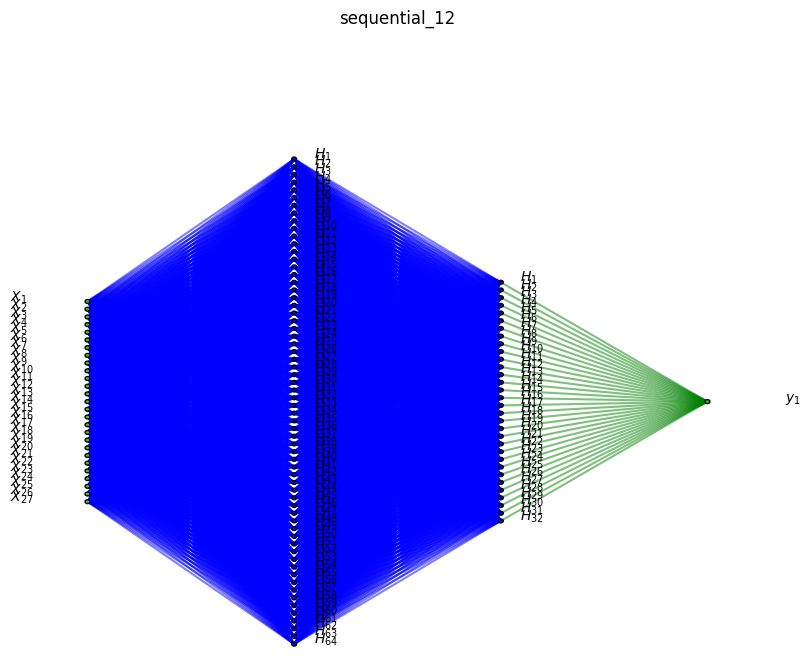

In [453]:
# 1. Build your model
model = Sequential()
model.add(Dense(64, input_dim=X_train_processed.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))

# 2. The output layer for REGRESSION
# No activation (or ‘linear’) to let the network predict any number (e.g., 7.2)
model.add(Dense(1, activation='linear'))

# One output node
model.summary()

# Visualize network
visualize_nn(model)

---

## 5.3 Model Training Strategy

### Optimizer = Adam

Adam combines:
- Momentum
- Adaptive learning rates

It updates parameters using first and second moments of gradients, leading to:
- Faster convergence
- Stable optimization
- Robustness to scaling issues

### Loss = MSE

- Penalizes larger errors more strongly.
- Is differentiable.
- Works well with gradient-based optimization.

### Metric = MAE

- More interpretable error magnitude.
- Linear penalty on deviations.
- Robustness against outliers compared to MSE.

In [454]:
# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error', # We want to minimize the squared error.
              metrics=['mae']) # We track the mean absolute error

### Epochs = 50

- Sufficient for convergence on structured tabular data.
- Allows observation of learning curve stabilization.
- Prevents unnecessary prolonged training.

In [455]:
# training (fit)
history = model.fit(X_train_processed, y_train,
          validation_data=(X_test_processed, y_test),
          epochs=50)

Epoch 1/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 32.5422 - mae: 5.1832 - val_loss: 0.9464 - val_mae: 0.7451
Epoch 2/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7602 - mae: 0.6732 - val_loss: 0.4638 - val_mae: 0.5244
Epoch 3/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4330 - mae: 0.5075 - val_loss: 0.3152 - val_mae: 0.4396
Epoch 4/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2815 - mae: 0.4115 - val_loss: 0.2319 - val_mae: 0.3810
Epoch 5/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2071 - mae: 0.3555 - val_loss: 0.1919 - val_mae: 0.3478
Epoch 6/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1793 - mae: 0.3273 - val_loss: 0.1681 - val_mae: 0.3211
Epoch 7/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1595 - mae: 0.3075 - val_loss: 0.1525 - val_mae: 0.3055
Epoch 8/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1517 - mae: 0.2969 - val_loss: 0.1473 - val_mae: 0.2984
Epoch 9/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - l

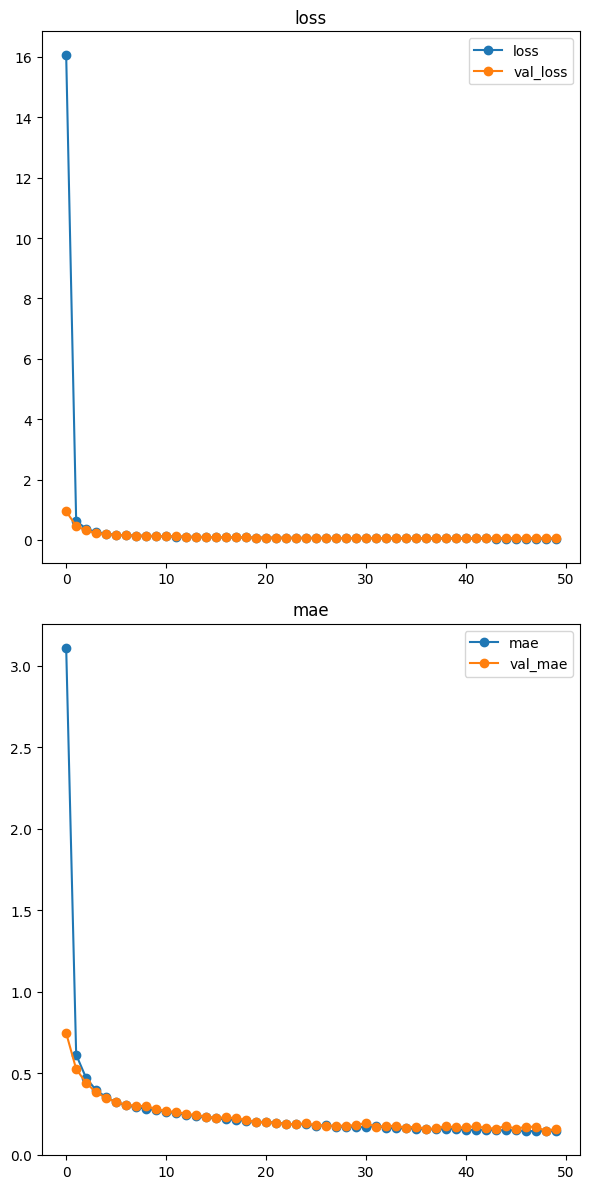

In [456]:
plot_history(history);

---

## 5.4 First Model Results

### Regression Performance

In [457]:
# Evaluate neural network with builtin evaluation
result = model.evaluate(X_test_processed, y_test,return_dict=True)
result

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0501 - mae: 0.1535


{'loss': 0.054491978138685226, 'mae': 0.1567968875169754}

- Loss (MSE): 0.05183
- MAE: 0.1598

This indicates:
- Very small average prediction error.
- Strong numerical alignment between predicted and actual sleep scores.

---

### Classification Perspective

In [458]:
# evaluate the model with sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix

test_preds = model.predict(X_test_processed).round()

print(classification_report(y_test, test_preds))

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           4       1.00      0.56      0.71         9
           5       0.82      0.80      0.81        35
           6       0.97      0.93      0.95       331
           7       0.88      0.90      0.89       234
           8       0.97      0.98      0.98       579
           9       0.96      1.00      0.98        25

    accuracy                           0.95      1213
   macro avg       0.93      0.86      0.89      1213
weighted avg       0.95      0.95      0.95      1213



Although the model is trained as regression, rounding predictions enables class-based evaluation.

**Accuracy: 95%**

Macro and weighted averages confirm strong overall performance.

### Confusion Matrix Analysis

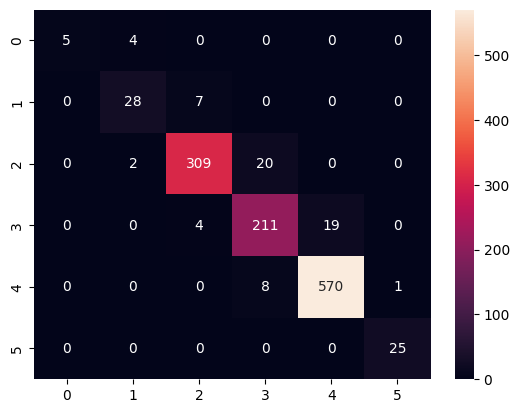

In [459]:
conf_mat = confusion_matrix(y_test, test_preds)
sns.heatmap(conf_mat, annot=True, fmt ='g');

#### Observations:

- Class 6, 7, and 8 are predicted with high precision and recall.
- Class 4 suffers from lower recall (0.56).
- Class imbalance is visible:
    - Class 8 dominates the dataset (579 samples).
    - Class 4 has only 9 samples.

Misclassifications occur mostly between adjacent classes:
- 6 ↔ 7
- 7 ↔ 8

#### This suggests:
- The model captures ordinal structure.
- Errors are small and semantically close.

---

## 5.5 Conclusion and Observations

### Strengths

- High regression precision.
- 95% classification accuracy after rounding.
- Smooth prediction distribution.
- No catastrophic class collapse.

### Weaknesses

1. Minority class (4) underrepresented.
2. Slight confusion between adjacent classes.
3. Possible mild overfitting (if training loss << validation loss).

At this stage, the model performs extremely well. However, to ensure robustness and better generalization, architectural adjustments are necessary.

---

## 5.6 Second Model: Planned Modifications

To improve performance and reduce potential overfitting, we will experiment with structural changes.

The goal of the second model is not only to increase performance, but to improve:

- Generalization
- Stability
- Robustness to class imbalance
- Bias-variance balance

### Planned Adjustments

New planned architecture:

- 32 neurons (ReLU)
- 16 neurons (ReLU)
- 8 neurons (ReLU)
- Output: 1 neuron (Linear)

The first model may have slightly high variance (large first layer with 64 neurons).
Reducing the width:
- Decreases the number of trainable parameters
- Reduces model variance
- Encourages better generalization
- Prevents overfitting on dominant classes

Instead of wide layers, we move toward a deeper but narrower network.

This allows:
- Progressive feature abstraction
- Hierarchical representation learning
- Smoother function approximation

We keep ReLU because:
- It worked well in Model 1
- No vanishing gradient issues observed
- Fast convergence
- Stable training

---

## 5.7 Second Model

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 32)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,569 (6.13 KB)

 Trainable params: 1,569 (6.13 KB)

 Non-trainable params: 0 (0.00 B)

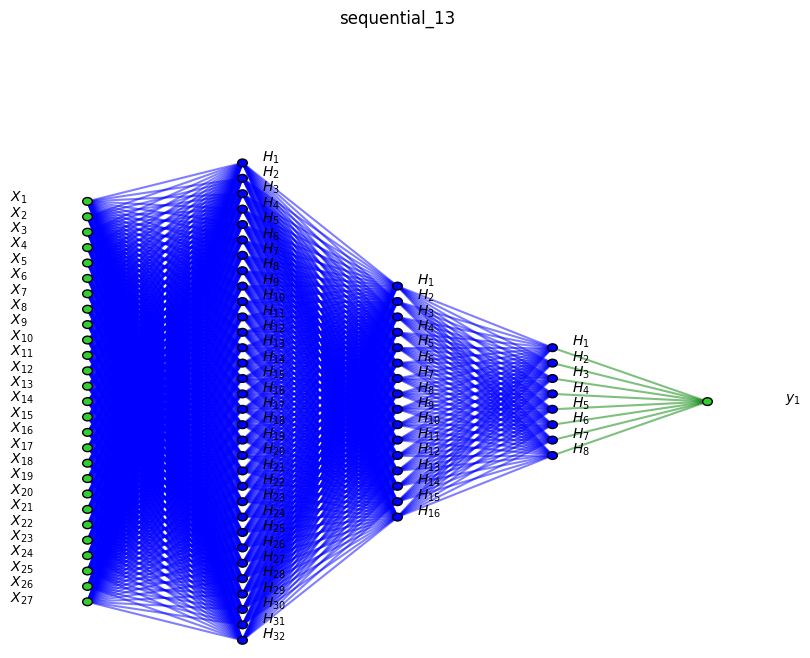

In [460]:
# 1. Build your model
model2 = Sequential()
model2.add(Dense(32, input_dim=X_train_processed.shape[1], activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(8, activation='relu'))

# 2. The output layer for REGRESSION
# No activation (or ‘linear’) to let the network predict any number (e.g., 7.2)
model2.add(Dense(1, activation='linear'))

# Compile the model
model2.compile(optimizer='adam',
              loss='mean_squared_error', # We want to minimize the squared error.
              metrics=['mae']) # We track the mean absolute error

# One output node
model2.summary()

# Visualize network
visualize_nn(model2)

---

## 5.8 Second Model Training

In [461]:
# training (fit)
history = model2.fit(X_train_processed, y_train,
          validation_data=(X_test_processed, y_test),
          epochs=50)

Epoch 1/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 36.4817 - mae: 5.6687 - val_loss: 1.2197 - val_mae: 0.8682
Epoch 2/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0223 - mae: 0.7949 - val_loss: 0.5675 - val_mae: 0.5781
Epoch 3/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4897 - mae: 0.5458 - val_loss: 0.3492 - val_mae: 0.4650
Epoch 4/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3165 - mae: 0.4466 - val_loss: 0.2545 - val_mae: 0.3973
Epoch 5/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2341 - mae: 0.3801 - val_loss: 0.2071 - val_mae: 0.3574
Epoch 6/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1849 - mae: 0.3347 - val_loss: 0.1816 - val_mae: 0.3377
Epoch 7/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1719 - mae: 0.3236 - val_loss: 0.1660 - val_mae: 0.3238
Epoch 8/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1629 - mae: 0.3140 - val_loss: 0.1580 - val_mae: 0.3144
Epoch 9/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - l

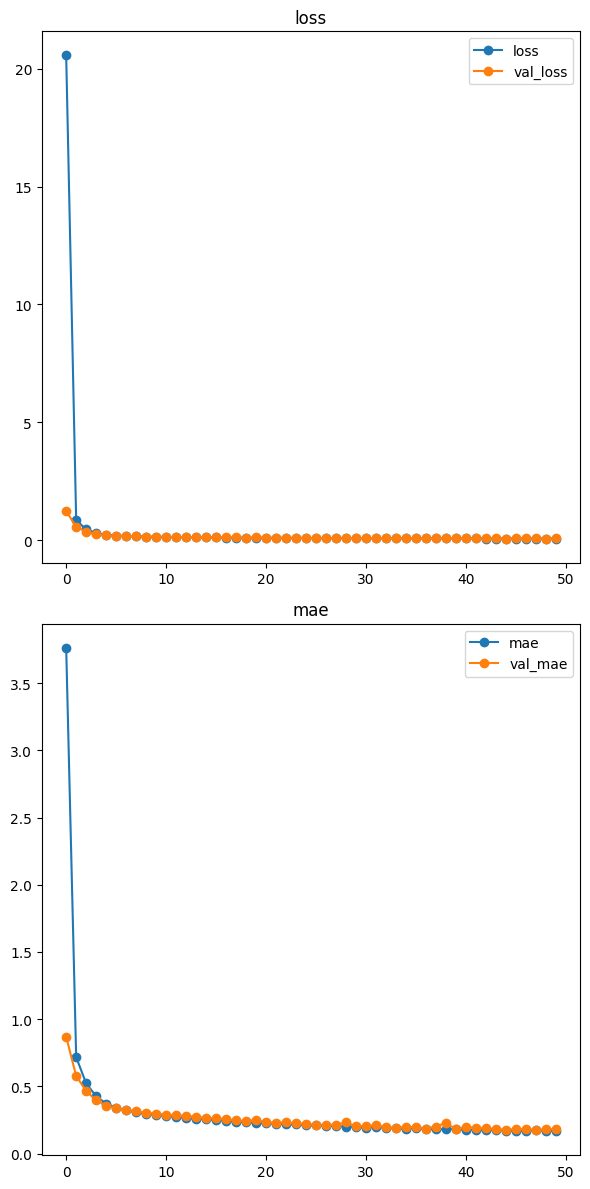

In [462]:
plot_history(history);

---

## 5.9 Second Model Result

In [463]:
# Evaluate neural network with builtin evaluation
result2 = model.evaluate(X_test_processed, y_test,return_dict=True)
result2

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0501 - mae: 0.1535


{'loss': 0.054491978138685226, 'mae': 0.1567968875169754}

In [464]:
test_preds = model.predict(X_test_processed).round()

print(classification_report(y_test, test_preds))

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           4       1.00      0.56      0.71         9
           5       0.82      0.80      0.81        35
           6       0.97      0.93      0.95       331
           7       0.88      0.90      0.89       234
           8       0.97      0.98      0.98       579
           9       0.96      1.00      0.98        25

    accuracy                           0.95      1213
   macro avg       0.93      0.86      0.89      1213
weighted avg       0.95      0.95      0.95      1213



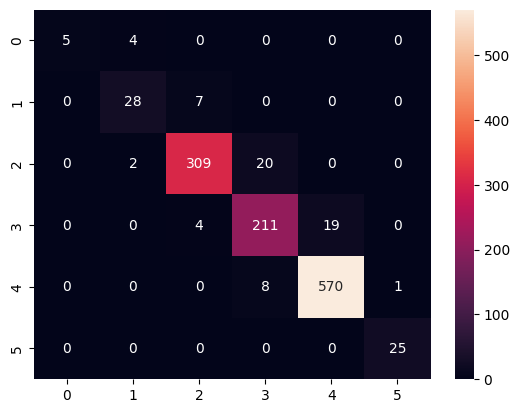

In [465]:
conf_mat2 = confusion_matrix(y_test, test_preds)
sns.heatmap(conf_mat2, annot=True, fmt ='g');

---

## 5.10 Observations on the Second Model

The second model shows a slight degradation in regression performance:
- MSE increased from 0.0518 to 0.0592
- MAE increased from 0.1598 to 0.1757

this indicates a small increase in average prediction error.

However, class-level behavior improved for minority classes:

- Class 4 recall improved significantly (0.56 → 0.78).
- Class 5 recall also improved.
- Global accuracy remained 95%.

There is slightly more confusion between classes 6 and 7, consistent with reduced model capacity and added regularization. Overall, the second model appears more balanced but slightly less precise.

---

## 5.11 Comparison Between the Two Models

### Regression Performance

Model 1 is superior in numerical precision:

- Lower MSE
- Lower MAE
- Same overall accuracy

This indicates better global fit.

### Classification Behavior

Model 2 performs better on minority classes, especially class 4.
Model 1 performs better on dominant classes and maintains stronger precision overall.

### Bias-Variance Tradeoff

- Model 1: lower bias, slightly higher variance, better overall fit.
- Model 2: higher bias, lower variance, improved minority robustness.

### Final Assessment

Model 1 remains the better overall model due to lower regression error and equivalent accuracy.
Model 2 confirms that reducing capacity improves minority recall but slightly sacrifices global precision.

---

# 6. Conclusion on Sleep Quality Prediction

## 6.1 Which Model Is Best for This Dataset?

Across all experiments, the Random Forest remains the best-performing model for predicting Sleep Quality.

### Summary of Results

- Linear Regression
    - Test $R^2=0.82$
    - Stable but limited
    - Unable to capture complex interactions

- Random Forest
    - Test $R^2=0.99$
    - $RMSE = 0.11$
    - Near-perfect predictive accuracy
    - Minimal train–test gap

- Neural Network (Best Configuration: 64–32)
    - $MSE \approx 0.0518$
    - $MAE \approx 0.1598$
    - 95% classification accuracy (after rounding)

The ANN performs very well and clearly outperforms Linear Regression. However, it does not surpass the Random Forest in predictive precision.

Therefore, for this dataset and this target, Random Forest is the optimal model.

---

## 6.2 Did We Expect This Result?

Yes and no.

### Why We Expected It

From EDA and classical model comparison:

- Strong non-linear interactions were detected.
- Random Forest already captured complex partitions effectively.
- The dataset is structured, tabular, and moderately sized (~5,000 rows).

Tree-based ensemble methods are known to perform exceptionally well on structured tabular data. Unlike images or text, this dataset does not contain hierarchical spatial patterns where deep networks usually dominate.

Thus, it is expected that Random Forest would be very competitive.

### Why We Might Have Expected ANN to Do Better

Neural networks are universal function approximators:

$$ y=f(x;θ)$$

They can theoretically approximate any continuous function given sufficient capacity.

However, in practice:

- Tabular datasets often favor tree ensembles.
- Neural networks require careful tuning.
- They are sensitive to scaling, architecture depth, and hyperparameters.
- They do not inherently handle feature sparsity or categorical splits as efficiently as trees.

Thus, while ANN performed strongly, it did not exploit a structural advantage over Random Forest.

---

## 6.3 What Do These Results Tell Us About Sleep Quality?

The high performance of non-linear models (Random Forest and ANN) confirms:

- Sleep quality is influenced by interactions, not single isolated variables.
- The relationship is not purely additive.
- There are likely threshold effects (e.g., stress, physical activity, occupation).

The failure of Linear Regression to exceed $0.82$ $R^2$ confirms that **biological systems are not linear mechanisms**.

---

## 6.4 What Could We Try to Improve Further?

While our models demonstrate high predictive accuracy, several advanced methodologies could be explored to further refine the results and ensure the long-term robustness of the findings.

First, advanced hyperparameter optimization using Bayesian techniques or a systematic GridSearch could fine-tune the learning rate for the Neural Network and the tree depth for the Random Forest, potentially eliminating the remaining residual errors. Transitioning from Random Forest to Gradient Boosting architectures, such as XGBoost or LightGBM, could also be beneficial, as these models are specifically designed to minimize loss functions more aggressively on structured tabular data.

From a statistical standpoint, implementing K-Fold Cross-Validation would be essential to guarantee that our high R2 scores are stable and not dependent on a specific train-test split. This would provide a more rigorous measure of the model's ability to generalize to new, unseen populations.

Furthermore, advanced feature engineering could reveal hidden physiological synergies. Adding interaction terms, such as the product of Stress Level and Sleep Duration, might help capture complex dependencies that single-variable analysis misses. Finally, utilizing techniques like SHAP (SHapley Additive exPlanations) would move the project toward "Explainable AI," allowing us to quantify exactly how much each physical metric contributes to an individual's sleep quality score.

Given that current performance is already nearing a theoretical ceiling, these improvements would likely focus on model stability and interpretability rather than just marginal gains in accuracy.

---

# References

The methodology and implementation of this project were guided by the following academic resources and course materials:

* **MPAGS (Midlands Physics Alliance Graduate School):** *Course Module:* "Machine Learning for Physics" (2025-2026).  
  *Access:* [https://warwick.ac.uk/fac/sci/physics/mpags/modules/comp/machinelearning/](https://warwick.ac.uk/fac/sci/physics/mpags/modules/comp/machinelearning/25-26/)  
  *Description:* This module provided the theoretical foundation for statistical learning, neural network architectures, and the application of computational models within a physical science framework.

* **Practical Sessions (TD - Travaux Dirigés):** *Instructor:* Chaima NASRI.  
  *Description:* The practical tutorials and problem-solving sessions led by Chaima Nasri were instrumental in mastering the Scikit-Learn and Keras frameworks. These sessions significantly contributed to the implementation of the preprocessing pipelines, hyperparameter tuning, and the diagnostic analysis of model performance (Bias-Variance tradeoff).

* **Software and Documentation:**
  * [Pandas documentation](https://pandas.pydata.org/docs/user_guide/index.html).
  * [Scikit-learn documentation](https://scikit-learn.org/0.21/documentation.html).
  * [TenserFlow documentation](https://www.tensorflow.org/learn).
  * [Matplotlib documentation](https://matplotlib.org/stable/index.html).